# Датасет про опоссумов

In [ ]:
data = pd.read_csv("../../data/possum.csv")
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## Описание датасета

Пакет данных опоссумов состоит из девяти морфометрических измерений 
каждого из 104 горных опоссумов, пойманных в ловушку в семи местах 
от Южной Виктории до центрального Квинсленда.<br>

Вдохновение: *Можете ли вы использовать свои навыки регрессии, 
чтобы предсказать возраст опоссума, длину его головы, будь то самец или самка?* 

Столбцы:

* место где был пойман опоссум
* место обитания (Виктория или другое)
* пол
* возраст
* длина головы
* ширина черепа
* общая длина
* длина хвоста
* длина ноги

## Предобработка

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [ ]:
data.dropna(inplace=True,ignore_index=True)

In [ ]:
data = data.drop(['case'], axis=1)

In [ ]:
data.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [ ]:
data = data.rename(columns = {"Pop": "pop"})
data['pop'] = data['pop'].replace("Vic", 1)
data['pop'] = data['pop'].replace("other", 0)

data = data.rename(columns = {"sex": "sex_m"})
data['sex_m'] = data['sex_m'].replace("m", 1)
data['sex_m'] = data['sex_m'].replace("f", 0)

def f(df):
    if df['sex_m'] == 1:
        return 0
    else: return 1

data['sex_f'] = data.apply(f, axis=1)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data

,site,pop,sex_m,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_f
0,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,1,1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1
2,1,1,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1
3,1,1,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1
4,1,1,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,0,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0
97,7,0,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0
98,7,0,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,1
99,7,0,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0


Регрессия и классификация

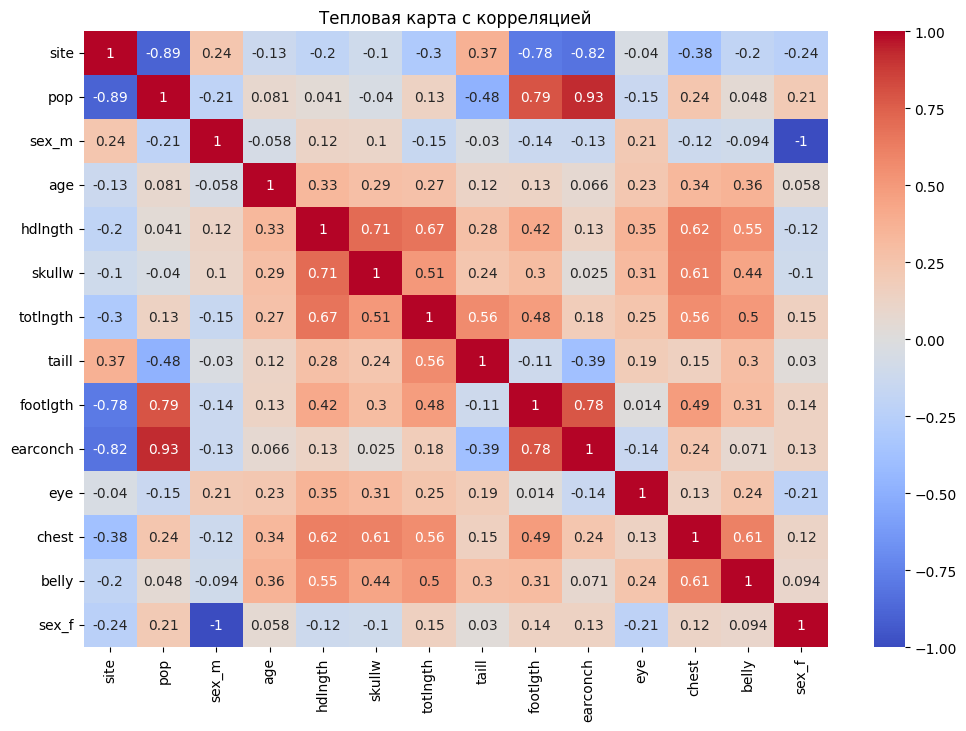

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта с корреляцией')
plt.show()

In [ ]:
y = pd.DataFrame(data["earconch"])
x = pd.DataFrame(data.drop(["earconch"], axis=1))
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x, y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train = y_train.values.ravel()

In [ ]:
param_grid = {
    'kernel':['poly'],
    'degree': range(3, 6),
    'gamma':['scale', 'auto'],
}

gridseach = GridSearchCV(svm.SVR(), param_grid=param_grid, scoring="r2")
gridseach.fit(x_train, y_train)

best_params = gridseach.best_params_

In [ ]:
print(best_params)

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
svr = svm.SVR(**best_params)
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from sklearn.pipeline import Pipeline

In [ ]:
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred_svr))}')
print(f'R^2: {svr.score(x_test, y_test)}')

MAPE: 0.17651685723253457
R^2: 0.740454536170819


In [ ]:
data['pop'].value_counts()

pop
0    58
1    43
Name: count, dtype: int64

In [ ]:
y = pd.DataFrame(data['pop'])
x = pd.DataFrame(data.drop(['pop'], axis=1))
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x, y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.values.ravel()
param_grid = {
    'kernel':['poly'],
    'degree': range(3, 6),
    'gamma':['scale', 'auto'],
}

gridseach = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring="f1")
gridseach.fit(x_train, y_train)
best_params_c = gridseach.best_params_
print(best_params)
clf = svm.SVC(**best_params)
clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)
print(classification_report(y_test['pop'], y_pred_svm))

print ('SVM\n', confusion_matrix(y_test['pop'],y_pred_svm))
metric.roc_auc_score(y_test['pop'], y_pred_svm)

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

SVM
 [[20  0]
 [ 0 11]]


1.0